Evaluation of the performance of classification models can be facilitated through a combination of calculating certain types of performance metrics and generating model performance evaluation graphics.For this assignment youwill be tasked with calculating a suite of classification model performance metrics via Python code functions that you create and then comparing your results to those of pre-built Python functions that automatically calculate those same metrics.  You will also be creating graphical output via Python code that can be used to evaluate the performance of classification models. 

The data set you will be using for this work is comprised of approximately 180 labeled binary observations (i.e., the classification is binary in nature). The classifications are either ‘0’ or ‘1’. A classification model has been used to “predict” the actual classifications for each observation, and its algorithm works by estimating the probability that the correct classification for each observation is a ‘1’.  The data setincludes three attributes that you will make use of for your analysis:

1. class: the actual classification for the observation

2. scored.class: the predicted classification for the observation (can only be ‘0’or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold))

3. scored.probability: the classification model’s probabilityscore (i.e., the likelihood that the correct classification for an observation is a ‘1’)for the observation

Complete each of the following tasks as specified:

1. Load the provided M5_Data.csv file to your DAV 6150 Github Repository. 
2. Then, using a Jupyter Notebook, read the data set from your Github repository and load it into a Pandas dataframe.
3. Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data. Make sure you closely examine the output e.g., do the rows represent the actual or the predicted classification? What about the columns? (HINT: A good way to ensure you understand the output of the crosstab() function is to check the value_counts() for the dataframe columns you’ve used as input to the crosstab() function. When observing the value_counts(), determine whether the rows or columns in the crosstab() output sum to the respective value_counts() figures).
4. Extract the individual confusion matrix values (i.e., True Positive, False Positive, True Negative, False Negative) from the output of the crosstab ()function and save them for later use (e.g., save them each to individual variables or to the data structure of your choice). Knowing how to properly extract these values from the output of crosstab() will serve you well throughout the remainder of the assignment
5. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the accuracy metric for the predictions without utilizing any pre-built Python accuracy metric calculation functions.
6. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the precision metric for the predictions without utilizing any pre-built Python classification metric calculation functions.
7. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the sensitivity metric for the predictions without utilizing any pre-built Python classification metric calculation functions.
8. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the specificity metric for the predictions without utilizing any pre-built Python classification metric calculation functions. 
9. Write a Python function that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the F1 Score metric for the predictions without utilizing any pre-built Python classification metric calculation functions.
10. Write a Python function to plot a ROC curve and also calculate AUC for any binary classification data that containsboth actual and predicted classifications as well as the associated scored probabilities without utilizing any pre-built Python classification metric calculation or ROC or AUC functions.
11. Apply the Python functions you’ve created to the relevant columns of the provided data set to produce the classification metrics specified in steps 5 through 9 of this assignment.
12. Now compare the output of your functions against the output of the pre-built functions available within the scikit-learn library. Specifically, apply the confusion_matrix(), accuracy_score(),  precision_score(), recall_score() (remember: recall = sensitivity), f1_score(), and the metrics.classification_report() functions to the relevant columns of the provided data set. Discuss how well the results of these pre-built functions compare to those of the functions you’ve created for this assignment.
13. Using the metrics.plot_roc_curve() and metrics.auc() functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set. How do the results compare with the ROC/AUC function you’ve created for this assignment?

Your Jupyter Notebook deliverable should be similar to that of a publication-quality  / professional caliber document and should include clearly labeled graphics, high-quality formatting, clearly defined section and sub-section headers, and be free of spelling and grammar errors. Furthermore, your Pythion code should include succinct explanatory comments. 

Upload your Jupyter Notebook within the provided M5Assignment Canvas submission portal.  Be sure to save your Notebook using the following nomenclature:first initial_last name_M5_assn" (e.g., J_Smith_M5_assn_).  Small groups should identity all group members at the start of the Jupyter Notebook and each team member should submit their own copy of the team’s work within Canvas.

Grading rubric: you'll receiveup to 90 points if you successfully complete tasks 1-9, 11, and 12. To get the full 100 pointson the assignment, you will also need to successfully complete tasks 10 and 13.

# Data Science: Module 5
## Practical Challenge: Classification Model Performance Metrics
### Jacob Goodman & Alan Leidner
#### Oct 17, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191953

## Introduction

## Importing Dependencies

In [ ]:
#Import packages for data frames 
import numpy as np
import pandas as pd

## importing data

In [ ]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M5/M5_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


## creating cross tab

1. We will now construct a coefficient matrix utilizing the crosstab() method for use as a input in our functions.For a prettier output we will convert our input data to Boolean format and name our column and index to help users understand what they represent.

2. we will also save our Y_pred, Y_true and scored.probability columns in its own variables for use later in the assignement 


In [ ]:
#1.creating crosstab
df_crosstab = pd.crosstab(df['class'].astype('bool'), df['scored.class'].astype('bool'),rownames=['predicted_diabetic'], colnames=['true_diabetic'])
# df_crosstab.sort_index(ascending=False,inplace=True)
# df_crosstab.sort_index(axis=1,ascending=False,inplace=True)


#2. storing variables
scored_probablity = df['scored.probability']
y_pred = df['scored.class']
y_true = df['class']

# sainty check the crosstab
df_crosstab

true_diabetic,False,True
predicted_diabetic,,
False,119,5
True,30,27


## create a class

We will now construct a class that will do the following. 
1. store the seperate parts of the confusion matrix
2. provide methods to caculate model statics

**Input:**

* this class should take as input a confusion matrix
* matrix column and row names are expected to be either True/False or 1/0 

**0n initialization:**
* split confusion matrix into consituent peices
  * true positives
  * false positives
  * true negatives
  * false nagatives
  * total observations

**availble methods:** 
1. precision
2. sensitivity
3. spcificity
4. f1


In [ ]:
class coefmatrix:
    """ this class takes a Dataframe containing a Coefectiant matrix with column names of either 0,1 or True,False and provides model stastics for binary models"""
    def __init__(self,df):
        self.crosstab = df
        # extract values from table
        #true positives
        try:
          self.TruePositives = df.loc[1,1] # True Positives
        except KeyError:
          self.TruePositives = 0
        #true negatives
        try:  
          self.TrueNegatives = df.loc[0,0] # True Negatives 
        except KeyError:
          self.TrueNegatives = 0
        #False positives
        try:  
          self.FalsePositives = df.loc[0,1] # False Positives
        except KeyError:
          self.FalsePositives = 0
        #False Negatives
        try:
          self.FalseNegatives = df.loc[1,0] # False Negatives
        except KeyError:
          self.FalseNegatives = 0
        #total records
        self.TotalRecords = df.values.sum()
        


          
    def accuracy(self)  -> int:
        return (self.TruePositives+self.TrueNegatives)/self.TotalRecords

    def precision(self)  -> int:
        return self.TruePositives/(self.TruePositives+self.FalsePositives)
    
    def recall(self)  -> int:
        "recall or sensitivty or True positive rate is cacualted as the fraction of correctly predicted posisitves out of all ppositives"
        return self.TruePositives/(self.TruePositives+self.FalseNegatives) 
    
    def specificity(self) -> int:
        return self.TrueNegatives/(self.TrueNegatives+self.FalsePositives)

    def f1(self) -> int:
        return 2*self.precision()*self.recall()/(self.precision()+self.recall())

    def fpr(self)  -> int: # false positive rate to be utilized in ROC curve function
      
        return self.FalsePositives/(self.TrueNegatives+self.FalsePositives)
      


## Comparing class metrics to prebuilt 
we will now compare our class metrics to prebuild metrics  
steps:
1.  import needed functions
2. initialize a member of our new class
3. compare each class method to an sklearn.metrics function


In [ ]:
# 1. importing functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#2. initializing class object
matrix = coefmatrix(df_crosstab)

### confusion_matrix()

In [ ]:
display(confusion_matrix( df['class'], df['scored.class']))
print('\n')
matrix.crosstab

array([[119,   5],
       [ 30,  27]])

true_diabetic,False,True
predicted_diabetic,,
False,119,5
True,30,27


**conclusion:**  
Our values match and our dataframe provides the more 'sophisticated' output we are used to.

### accuracy_score()


In [ ]:
print(f'sklearn.accuracy_score: {accuracy_score(y_true,y_pred)}')
print(f'matrix.accuracy:        {matrix.accuracy()}')

sklearn.accuracy_score: 0.8066298342541437
matrix.accuracy:        0.8066298342541437


**conclusion:** our function matches sklearns

### recall()

In [ ]:
print(f'sklearn.recall_score: {recall_score(y_true,y_pred)}')
print(f'matrix.recall:        {matrix.recall()}')

sklearn.recall_score: 0.47368421052631576
matrix.recall:        0.47368421052631576


**conclusion:** our function matches sklearns

### f1_score()

In [ ]:
print(f'sklearn.f1_score: {f1_score(y_true,y_pred)}')
print(f'matrix.f1:        {matrix.f1()}')

sklearn.f1_score: 0.6067415730337079
matrix.f1:        0.6067415730337079


### classification_report()

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



**conclusions:**   
sklearns classification report has signifignalty less specificiy and a relativaly confusioning output. I can be useful but a lot of care has to be taken to make sure output is being interpreted correctly and an understanding of the limitations is known.


## ROC/AUC


**understanding steps for ROC:**  
steps it takes:
1. set the number of thresholds or steps between 0,1 we want to calculate
2. For each of those steps calculate the rate at which records would be accurately or inaccurately classified if that step was threshold for a predication counting as true. (recall and false positive rate)
3. store each recall and false positive rate to be plotted to create ROC graphic and to be utlized in AUC calcualtion


**understanding steps for AUC:**

reference on the trapexoidal method:
https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119261087.app1


steps it takes:
1. break our threashold encoded data into a series of 2x2 matrixs encoding the 2 points between spots on the ROC graphic as a series of trapaezoids. 
2. use numpys np.trapz function to integrate each *trapezoid*
3. sum the totals together to get full area under the curve


### from scratch implementation:

#### function creation

In [ ]:
def ROC_curve_AUC(y_true,scored_probablity,number_of_points = 105 ):
  """
  caculates the ROC by caculating recall and false positive rate at all thresholds between .0 -1.04 and returns the results
  as a numpy array.

  Then calcualtes AUC by utlizing trapizodal method to integrate array.

  Return ROC array and AUC
  
    references ROC:
    * https://www.youtube.com/watch?v=afQ_DyKMxUo 
    * https://towardsdatascience.com/roc-curve-and-auc-from-scratch-in-numpy-visualized-2612bb9459ab
  
    references AUC:
    * https://github.com/akshaykapoor347/Compute-AUC-ROC-from-scratch-python/blob/master/AUCROCPython.ipynb
    * https://numpy.org/doc/stable/reference/generated/numpy.trapz.html
  """

  import numpy as np #best practice import deps in functions
  roc_point = np.array([]) #initialize ROC array 
  
  #iterate for number of points set as input calculating Recall and FPR for each 
  for i  in range(0,number_of_points,1):

    #create a new predicted array at current threashold
     threshold_vector = np.greater_equal(scored_probablity, i / number_of_points).astype(int)
     
     # initializ a coefficient object ie caculate model stastics
     coef = coefmatrix(pd.crosstab(y_true,threshold_vector))

      #store recall and false positive rate for threashold 
     roc_point = np.append(roc_point,[coef.fpr(),coef.recall()])
  
  #reshape array 2 columns wide -1 here means the # of rows is dynamic/unknown 
  ROC = roc_point.reshape(-1,2)

  # we will now utlize the ROC array to caculate AUC 
  #initalize calculation arrays
  fpr_array = [] 
  tpr_array = []

  #iterate over ROC array to create 2x2 trapezoid matrix's 
  for i in range(len(ROC)-1):
    point1 = ROC[i];
    point2 = ROC[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])

  #We use Trapezoidal rule to calculate the area under the curve by approximating the intergral 
  auc = sum(np.trapz(tpr_array,fpr_array))+1  # Don't 100% understand +1 here I get that return is actually area not under cruve +1 to invert but don't grok 

  return ROC, auc

#### visualization

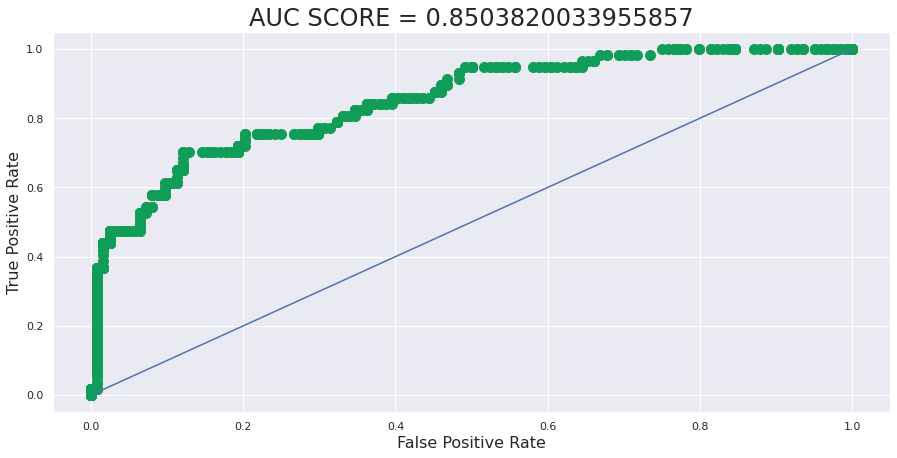

In [ ]:
#ploting utlizing our from scratch function
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
plt.figure(figsize=(15,7))

ROC, AUC = ROC_curve_AUC(y_true,scored_probablity,number_of_points = 1005)
plt.title(f'AUC SCORE = {AUC}', fontsize=24)
plt.plot([0,1]);
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100);
plt.xlabel('False Positive Rate',fontsize=16);
plt.ylabel('True Positive Rate',fontsize=16);

### sklearn metrics.roc() /metrics.auc()

we will now compare our custom implementation to sklearn's built in.

steps:
1. create clasification model 
2. utlize Plot_roc_curve and auc functions


In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

plot_roc_curve()

SyntaxError: ignored

# exta cells

Calculating AUC

In [ ]:
# https://github.com/akshaykapoor347/Compute-AUC-ROC-from-scratch-python/blob/master/AUCROCPython.ipynb

fpr_array = []
tpr_array = []
for i in range(len(ROC)-1):
    point1 = ROC[i];
    point2 = ROC[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])
#We use Trapezoidal rule to calculate the area under the curve and approximating the intergral  
#https://numpy.org/doc/stable/reference/generated/numpy.trapz.html
auc = sum(np.trapz(tpr_array,fpr_array))+1  # need to figure out why +1 here 
print('Area under curve={}'.format(auc))

In [ ]:
# https://www.youtube.com/watch?v=afQ_DyKMxUo
threshholds = np.array(list(range(0,105,1)))/100
threshholds

In [ ]:

threshholds = np.array(list(range(0,105,1)))/100

roc_point = []

for threshold in threshholds:
  
  tp = 0; fp = 0; fn = 0; tn = 0

  for index, instance in df.iterrows():
    actual = instance['class']
    prediction =  instance['scored.probability']

    if prediction >= threshold:
      prediction_class = 1
    else:
      prediction_class = 0
      
    if  actual == 1 and  prediction_class == 1:
      tp = tp + 1
    elif actual == 1 and prediction_class == 0:
      fn = fn + 1
    elif actual == 0 and prediction_class == 1:
      fp = fp + 1
    elif actual == 0 and prediction_class == 0:
      tn = tn + 1

  tpr = tp/(tp+fn)
  fpr = fp/(tn+fp)
    
  roc_point.append([tpr,fpr]

In [ ]:
roc_point

In [ ]:
pivot = pd.DataFrame(roc_point, columns = ['x','y'])
pivot['threshold'] = threshholds

In [ ]:
pivot

In [ ]:
import matplotlib.pyplot as plt
"""
plt.scatter(pivot.y, pivot.x)
plt.plot([0,1])#plots .5 "random results" line to compare


be carefull about doing this it will break the interperater and require a restart fixed on second example
plt.xlabel = "False Positive Rate" 
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
in the first example which i didn't think you overwrite the xlabel object with a string

"""

In [ ]:
auc = round(abs(np.trapz(pivot.x,pivot.y)),4)
auc